# Research on Knowledge Graph:
1. Introduction: https://www.youtube.com/watch?v=PZBm7M0HGzw&ab_channel=Computerphile: watch in 4x speed

- Example: Input for search engine: Bush House -> contains only characters:strings
- However it can have adress, openning hours, image ...
- Other search words may give different anwers from different clusters
- To figure out from which clusters to extract information Google uses: Knowledge Graph 
- The knowledge was there but google implemented the term Knowledge Graph?
- Knowledge graph connects different pieces/information together

- Huge DB with billion of facts extracted from documents/websites as text
- With machinery the text is processed and structured / learned from that information the conections
- Store the extracted facts about things and relations

- There is difference between data and abstract data: IMAX vs cinema 
- So a data can have common/joined properties with another other data
- This relations help for search results, question answering, recommendation
- Allows accurate answers
- Computer has the problem to get accurate information from  an unstructured data but results are way better if the data is structured, in this case in a knowledge graph
- KG is not about displaying data in the visual sense more mathematical sense:
    - Graphs has nodes and edges (networks, maps:points,routes)
    - Edge would be any type of relations; can be represented as connection lines between nodes
    - If you imagine the edges as arrows , if the arrow has to ends than its symmetrical
    - From the KG you can infer new knowledge / based antology

- Google Knowledge API
- Wikipedia - Wikidata

2. Info: https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk
Def:
A knowledge graph is way of storing extracted information. 
KG makes use of a concept, that is a set of three items to store information about something:
- a subject, 
- a predicate and 
- an object

![https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk](images/KG.png)

Representation of data in KG:

sentence: London is the capital of England. Westminster is located in London.
KG:
- 2 triples -> (London, be capital, England), (Westminster, locate, London)
- 3 unique entities: London, England, Westminster
- 2 relations: be capital, locate

Hands on:

In [52]:
!python -m spacy download en_core_web_lg # large
# !python -m spacy download en_core_web_md # middle
# !python -m spacy download en_core_web_sm # small

/usr/bin/zsh: /home/pclinux/anaconda3/lib/libtinfo.so.6: no version information available (required by /usr/bin/zsh)
2023-09-30 17:09:16.521266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 17:09:17.438291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-30 17:09:18.729095: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-30 17:09:18.730773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been

In [79]:
# Import dependencies & load dataset
import re # Regular expression
import pandas as pd 
import bs4 # Beautiful Soup is a library that makes it easy to scrape information from web pages
import requests # making HTTP requests
import spacy # spaCy is a free open-source library for Natural Language Processing in Python
from spacy import displacy # Visualizers 
nlp = spacy.load('en_core_web_lg')

from spacy.matcher import Matcher
from spacy.tokens import Span

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm # Progressbar

pd.set_option('display.max_colwidth',2000)
%matplotlib inline

In [54]:
# Importing science journals between 1880 - 2023
from custom_functions import cf_clustering as cfc
# This is required when you're using jupyter notebook and want to make changes to your custom function
import importlib
importlib.reload(cfc)

file_path = "./data/1880-2023_Science_48966.csv"
input_column_name = "title_abstract"

columns_to_drop = [
    'paperId', 's2FieldsOfStudy', 'MAG', 'DOI', 'CorpusId',
    'ArXiv', 'DBLP', 'PubMed', 'PubMedCentral', 'id', 'issn',
    'alternate_issns', 'alternate_urls', 'type', 'publicationTypes', 'url'
]

df = cfc.prepare_dataset_for_modeling(input_column_name,columns_to_drop,file_path=file_path)
print('Complete')
df.shape
df['title_abstract'].sample(5)

Step 1/7: Loading the dataset ...
Step 2/7: Cleaning the dataset ...
Dropping 0 duplicates out of 48966 data points.
Dropping 17945 NaNs out of 48966 data points.
Cleaned df size 31021; Original df size: 48966
Step 3/7: Creating the analysis column ...
Step 4/7: Removing stopwords ...
Step 5/7: Dropping columns ...
Complete


10345    Epigenetic balance gene expression Polycomb COMPASS familiesA balancing act modifying chromatin Chromatin modifiers add chemical groups histones, proteins package DNA. modifications central cellular development, mutations molecular machinery linked variety human diseases. Piunti Shilatifard review balance prototypic chromatin modifiers Polycomb COMPASS complexes role gene regulation normal development. originally identified indispensible regulators fruit fly development, related roles identified organisms. Furthermore, mutations human homologs implicated various cancers. such, complexes serve effective targets epigenetic therapies. Science, issue p. 10.1126/science.aad9780 BACKGROUND Multicellular organisms depend precise orchestration gene expression direct embryonic development maintain tissue homeostasis life spans. Exactly cell type–specific patterns gene expression established, maintained, passed generation fundamental questions biology. Eukaryotes package DNA nucleosomes

In [ ]:
# Sentence Segmentation - Splitting the text into sentences
doc = nlp(df['title_abstract'][12566])
print(doc)
for tok in doc:
  print(tok.text, "...", tok.dep_)

Enzymatic Identification Fish ProductsComparative enzymological techniques used distinguish muscle lactate dehydrogenases 26 fish species. Intergeneric differences enzymatic properties frequently encountered. techniques revealed, addition, commercial samples frozen fish fillets, labeled "haddock," contained cod lactate dehydrogenase.
Enzymatic ... amod
Identification ... nmod
Fish ... nmod
ProductsComparative ... nmod
enzymological ... amod
techniques ... nsubj
used ... acl
distinguish ... ROOT
muscle ... compound
lactate ... compound
dehydrogenases ... dobj
26 ... nummod
fish ... compound
species ... dobj
. ... punct
Intergeneric ... amod
differences ... nsubj
enzymatic ... amod
properties ... nsubj
frequently ... advmod
encountered ... ROOT
. ... punct
techniques ... nsubj
revealed ... ROOT
, ... punct
addition ... npadvmod
, ... punct
commercial ... amod
samples ... nmod
frozen ... amod
fish ... compound
fillets ... conj
, ... punct
labeled ... acl
" ... punct
haddock ... oprd
, ...

Here is a list of the abbreviations for syntactic relationships used in the sentence, along with their meanings:
- amod - Adjectival modifier: An adjective that modifies a noun.
- nmod - Nominal modifier: A noun or noun phrase that modifies another noun.
- nsubj - Nominal subject: The noun or noun phrase that is the subject of a clause.
- acl - Adjectival clause: A verb or verb phrase that functions as an adjective, modifying a noun.
- ROOT - The main verb that serves as the root of the sentence's grammatical structure.
- compound - A word or phrase composed of two or more words joined together.
- nummod - Numeric modifier: A word or phrase that modifies a noun by indicating a number or quantity.
- dobj - Direct object: The noun or noun phrase that receives the action of a verb.
- punct - Punctuation: Marks used to separate and structure sentences or phrases.
- advmod - Adverbial modifier: An adverb that modifies a verb, adjective, or adverb.
- npadvmod - Noun phrase adverbial modifier: An adverbial phrase that modifies a noun.
- These abbreviations and their meanings help describe the grammatical relationships between words in a sentence.

In [ ]:
# Entities Extraction
# Parts of speech (POS) tags can be used to extract single words
# The dependency tree of the sentence needs to be parsed, if an entity spans across multiple words
# Compounds words needs to be merged: red wine

In [ ]:
# the function is from kaggle
def get_entities(sent):
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  # Looping through the tokens in the sentence
  for tok in nlp(sent):
    # Check: if punctuation mark
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      # Check for subject, store and reset other variables
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      # Check for object
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      # update prev token and dependency tags
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
# Testing the function - seems to be working but not great
print("doc",doc)
print(get_entities(doc))

doc Enzymatic Identification Fish ProductsComparative enzymological techniques used distinguish muscle lactate dehydrogenases 26 fish species. Intergeneric differences enzymatic properties frequently encountered. techniques revealed, addition, commercial samples frozen fish fillets, labeled "haddock," contained cod lactate dehydrogenase.
['frequently  techniques', 'frozen cod lactate dehydrogenase']


In [71]:
# Applying to the whole data set - the results are not great
entity_pairs = []

for i in tqdm(df['title_abstract'][:1000]):
  entity_pairs.append(get_entities(i))

100%|██████████| 1000/1000 [00:33<00:00, 29.57it/s]


In [ ]:
entity_pairs[10:20]

[['misshapen human HGPS nuclei', 'prelamin ICMT A'],
 ['processing semiconductor c motor controls', 'future'],
 ['microbial  interdependencies', 'healthy  skin'],
 ['apoptotic cell survival', 'canonical basis set'],
 ['opal CT quartz', 'formation dolomite'],
 ['freezing point depression protein',
  'percent freezing point depression serum'],
 ['lignin removal', 'native microfibrillar structure'],
 ['addition  mice', 'present home cage periods'],
 ['rating computations', 'safe load capacity'],
 ['specific T cell response', 'tumor regression']]

In [72]:
# Loading the data set without removing stop words - the results are better
print("Step 1/7: Loading the dataset ...")
df2 = cfc.load_csv_file_to_df(file_path)
print("Step 2/7: Cleaning the dataset ...")
df2 = cfc.clean_dataset(df2)
print("Step 3/7: Creating the analysis column ...")
df2 = cfc.combine_columns(df2,"title","abstract",input_column_name)
df2.shape
df2['title_abstract'].sample(5)

Step 1/7: Loading the dataset ...
Step 2/7: Cleaning the dataset ...
Dropping 18 duplicates out of 31021 data points.
Dropping 0 NaNs out of 31003 data points.
Cleaned df size 31003; Original df size: 31021
Step 3/7: Creating the analysis column ...


21280                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [73]:
# Sentence Segmentation - Splitting the text into sentences
doc = nlp(df2['title_abstract'][39230])
print(doc)
for tok in doc:
  print(tok.text, "...", tok.dep_)

Regulation of extravascular coagulation by microvascular permeability.Extravascular coagulation is a prominent feature of such important pathological processes as cellular immunity and neoplasia and has been thought to result from procoagulants associated with the inflammatory or tumor cells peculiar to these entities. It was found that increased microvascular permeability alone is sufficient to induce equivalent extravascular coagulation in several normal tissues. The results indicate that saturating levels of procoagulant are present even in normal tissues and that microvascular permeability is a rate-limiting step in extravascular coagulation.
Regulation ... ROOT
of ... prep
extravascular ... amod
coagulation ... pobj
by ... prep
microvascular ... amod
permeability ... pobj
. ... punct
Extravascular ... amod
coagulation ... nsubj
is ... ROOT
a ... det
prominent ... amod
feature ... attr
of ... prep
such ... amod
important ... amod
pathological ... amod
processes ... pobj
as ... prep

In [74]:
# Testing the function - seems to be working but not great
print("doc",doc)
print(get_entities(doc))

doc Regulation of extravascular coagulation by microvascular permeability.Extravascular coagulation is a prominent feature of such important pathological processes as cellular immunity and neoplasia and has been thought to result from procoagulants associated with the inflammatory or tumor cells peculiar to these entities. It was found that increased microvascular permeability alone is sufficient to induce equivalent extravascular coagulation in several normal tissues. The results indicate that saturating levels of procoagulant are present even in normal tissues and that microvascular permeability is a rate-limiting step in extravascular coagulation.
['microvascular  permeability', 'extravascular  coagulation']


In [84]:
# Applying to the whole data set - the results are better with stop words
entity_pairs = []

for i in tqdm(df2['title_abstract']):
  entity_pairs.append(get_entities(i))

100%|██████████| 31021/31021 [18:44<00:00, 27.58it/s]


In [66]:
entity_pairs[10:20]

[['situ messenger RNA measurements', 'epithelial cell cells'],
 ['bacterial MACPF fold', 'probably  infection'],
 ['indigenous  investments', 'higher  education'],
 ['active  results', 'bond cleavage heme copper oxidases'],
 ['circulating  that', 'current disease states'],
 ['conclusion', 'derived checkpoint signaling'],
 ['artificial leaf that', 'external  potential'],
 ['455114 grant RO5 We', 'Y. assistance'],
 ['other peptidoglycan docking interface', 'critical PGRP interaction'],
 ['meiotic  binding', 'specific DNA genome']]

In [ ]:
# get_entities must be improved to finding proper nouns for pronouns or filter them out (we,she,it,we,...)

In [67]:
# 2. Relation extraction - In prev step we determined nodes, now need the edges.
# We have to find a way to extract relations which are interesting for us
# the function from Kaggle tries to capture the predicate from 
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)
# Testing function
get_relation("John completed the task")

'completed'

In [76]:
relations = [get_relation(i) for i in tqdm(df2['title_abstract'][:1000])]

100%|██████████| 1000/1000 [00:32<00:00, 30.48it/s]


In [77]:
pd.Series(relations).value_counts()[:50]


is               42
suggest          29
provide          24
indicate         16
suggests         15
show             13
1                13
be               12
shows            11
provides          9
found             9
have              8
demonstrate       8
are               8
used              6
pending           6
was               6
appears           5
demonstrates      5
discussed         5
seems             5
establish         5
propose           5
indicates         5
found in          5
describe          4
allow             4
observed          4
In                4
suggested         4
4                 4
2                 4
highlights        4
identified        4
demonstrated      4
explain           4
revealed          3
shown             3
offer             3
play              3
establishes       3
read              3
is consistent     3
proposed          3
identify          3
allows            3
represents        3
raises            3
influenced by     3
were              3


In [78]:
# 3. Build Knowledge Graph
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [80]:
# networkx library to create a network from this dataframe, relation is only one way
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

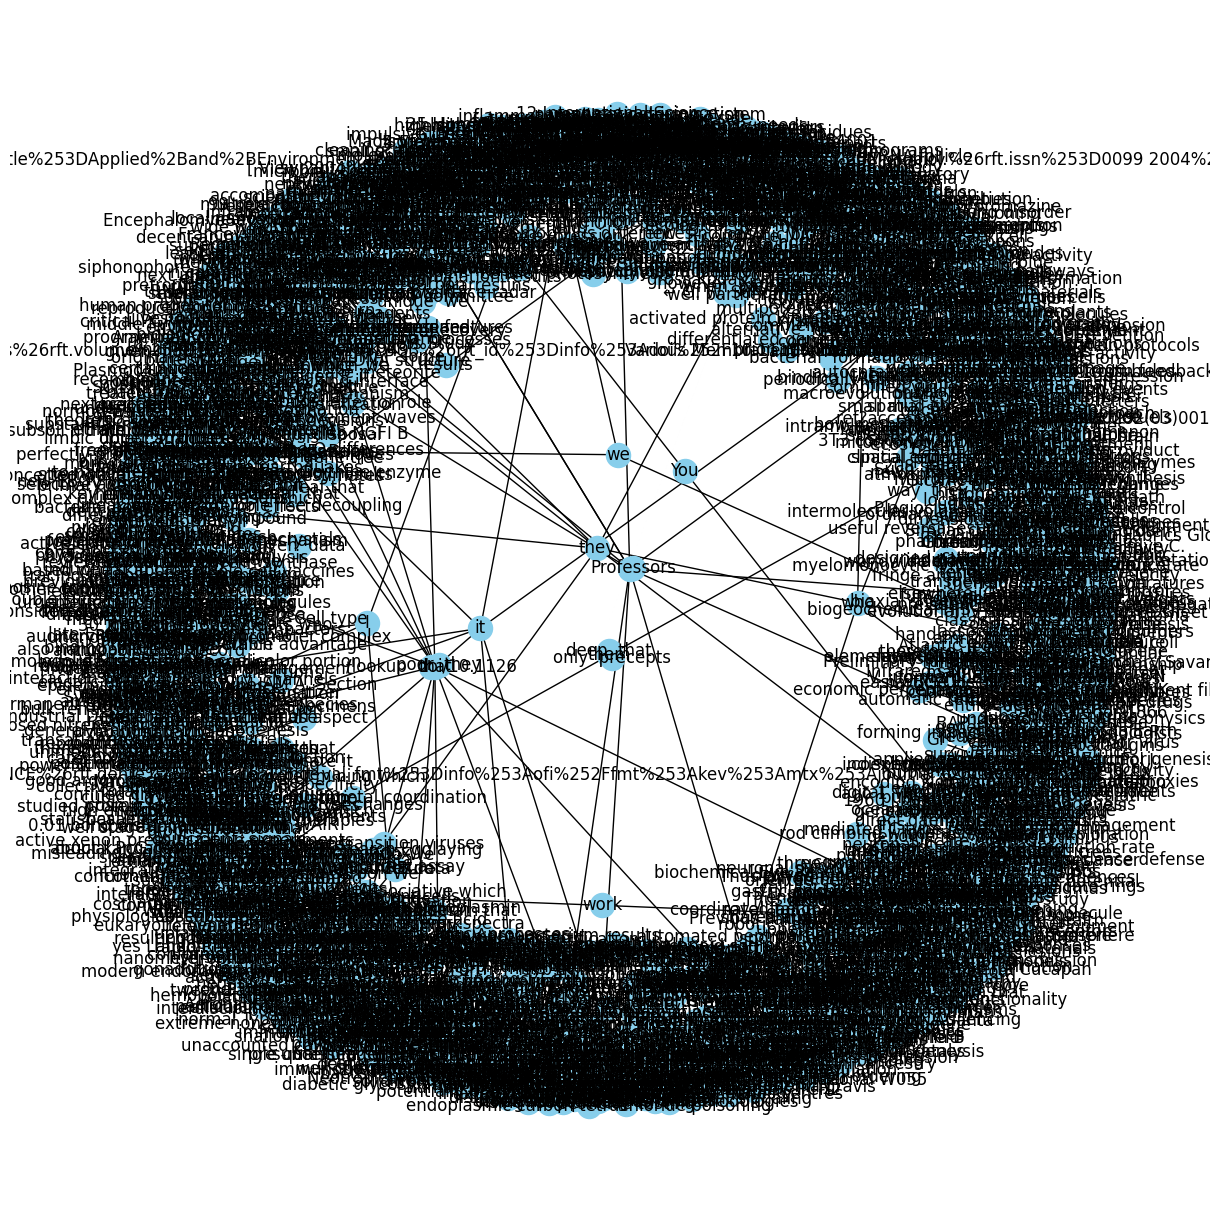

In [81]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

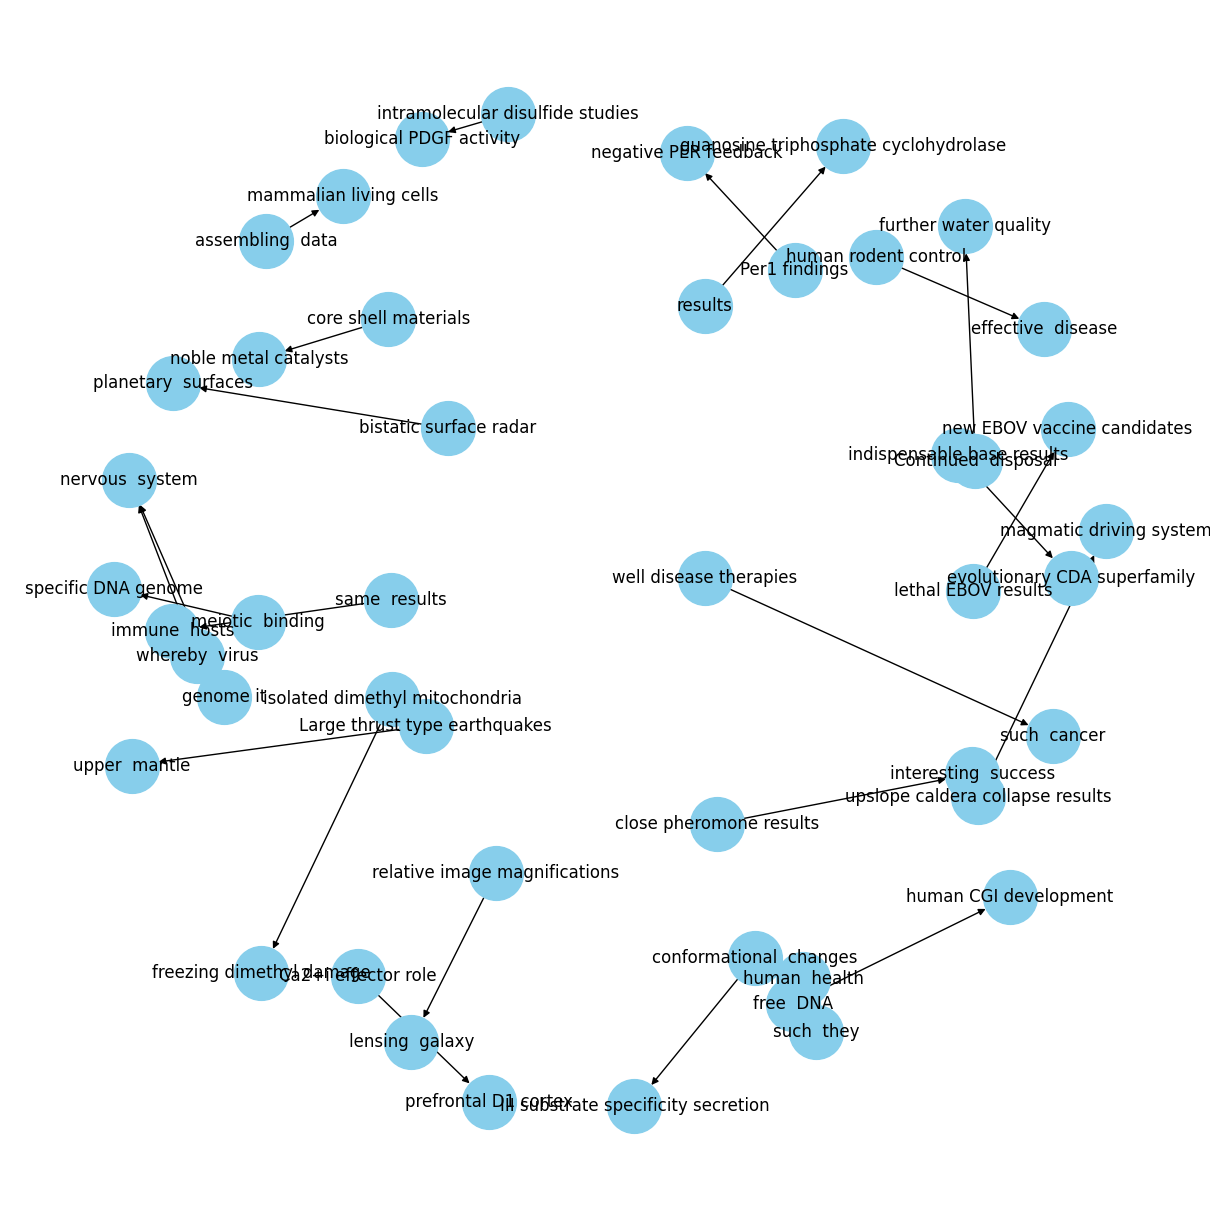

In [82]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="provide"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

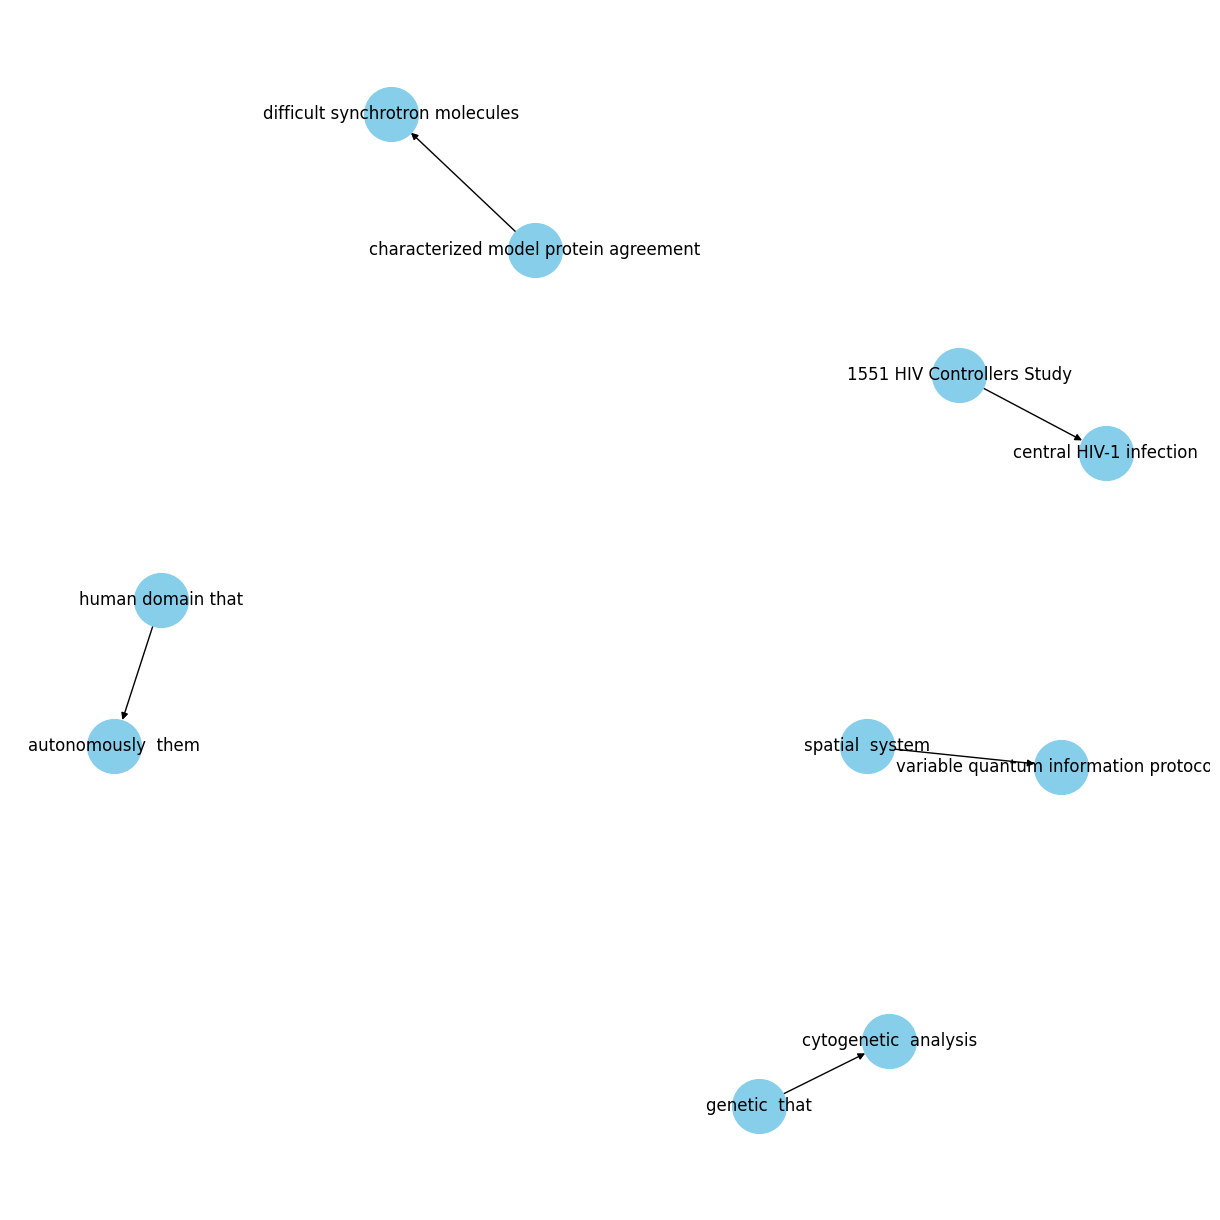

In [83]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="demonstrates"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()